In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("survey_data_all_cities.csv")

In [13]:
df["id"].unique().__len__() == len(df["id"])

False

In [14]:
df = df.drop(columns=["id", "city", "geometry", "Unnamed: 0"])

In [15]:
any(df.duplicated()) # All rows are different

False

In [18]:
df.head()

,area,structural_system,n_floors,ductility,roof,excentricity_ratio_EC8,excentricity_ratio_CR,radius_ratio_EC8,slenderness,slenderness_elevation,compactness,setback_ratio_NTC,hole_ratio_NTC,contact_force,confinement_ratio,contact_ang_acc,contact_angle,relative_position
0,157.587073,M,2,pre_code,metallic,0.008977,0.001233,0.163246,3.192047,0.853937,0.999683,0.000000,0.0,0.641808,0.766664,1.613179,1.159877,corner
1,113.472340,M,2,low_code,bright_concrete,0.014597,0.001944,0.232176,3.338191,1.029110,0.997752,0.000000,0.0,0.020213,179.788573,0.067755,2.266547,confined
2,104.955486,M,2,medium_code,metallic,0.255642,0.039759,0.222898,2.101109,0.848932,0.859100,0.691307,0.0,0.287132,0.000000,0.220468,0.000000,lateral
3,108.829925,M,1,low_code,metallic,0.118364,0.016226,0.290952,1.594473,0.363125,1.000000,0.000000,0.0,1.379359,0.343423,0.461553,1.315166,corner
4,74.307299,M,2,low_code,metallic,0.029055,0.005175,0.281669,2.406757,1.079821,1.000000,0.000000,0.0,0.655337,4.344567,0.230092,2.238664,confined


In [17]:
# Combine M99/ADO, S, and W into a single class 'Other'
#df['structural_system'] = df['structural_system'].replace(['M99/ADO', 'S', 'W'], 'Other')
df = df[df['structural_system'].isin(['M','CR','M99/ADO'])]
df.to_csv("3_classes_processed_data.csv")

In [40]:
df.to_csv("processed_data.csv")

structural_system
M          1218
CR          324
M99/ADO     122
Name: count, dtype: int64


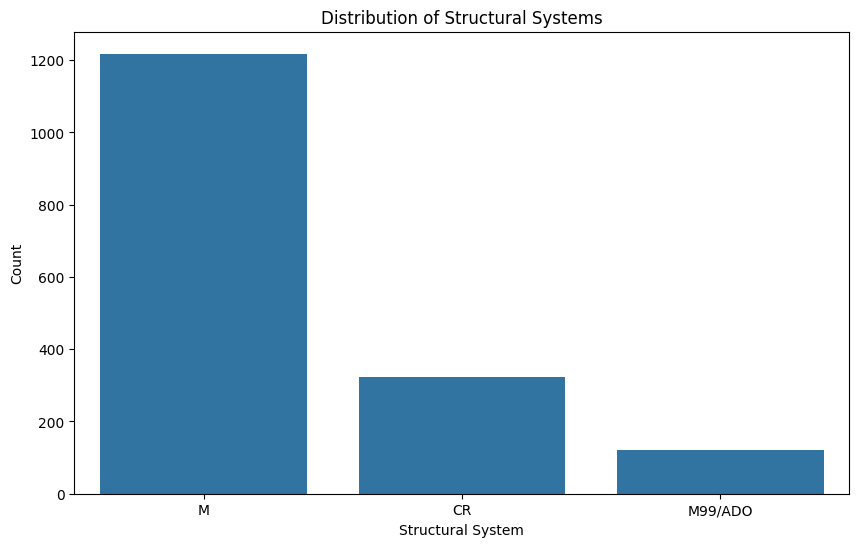

In [9]:
# Count the occurrences of each structural system
structural_system_counts = df['structural_system'].value_counts()
print(structural_system_counts)
# Plot the distribution of structural systems
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='structural_system')
plt.title('Distribution of Structural Systems')
plt.xlabel('Structural System')
plt.ylabel('Count')
plt.show()

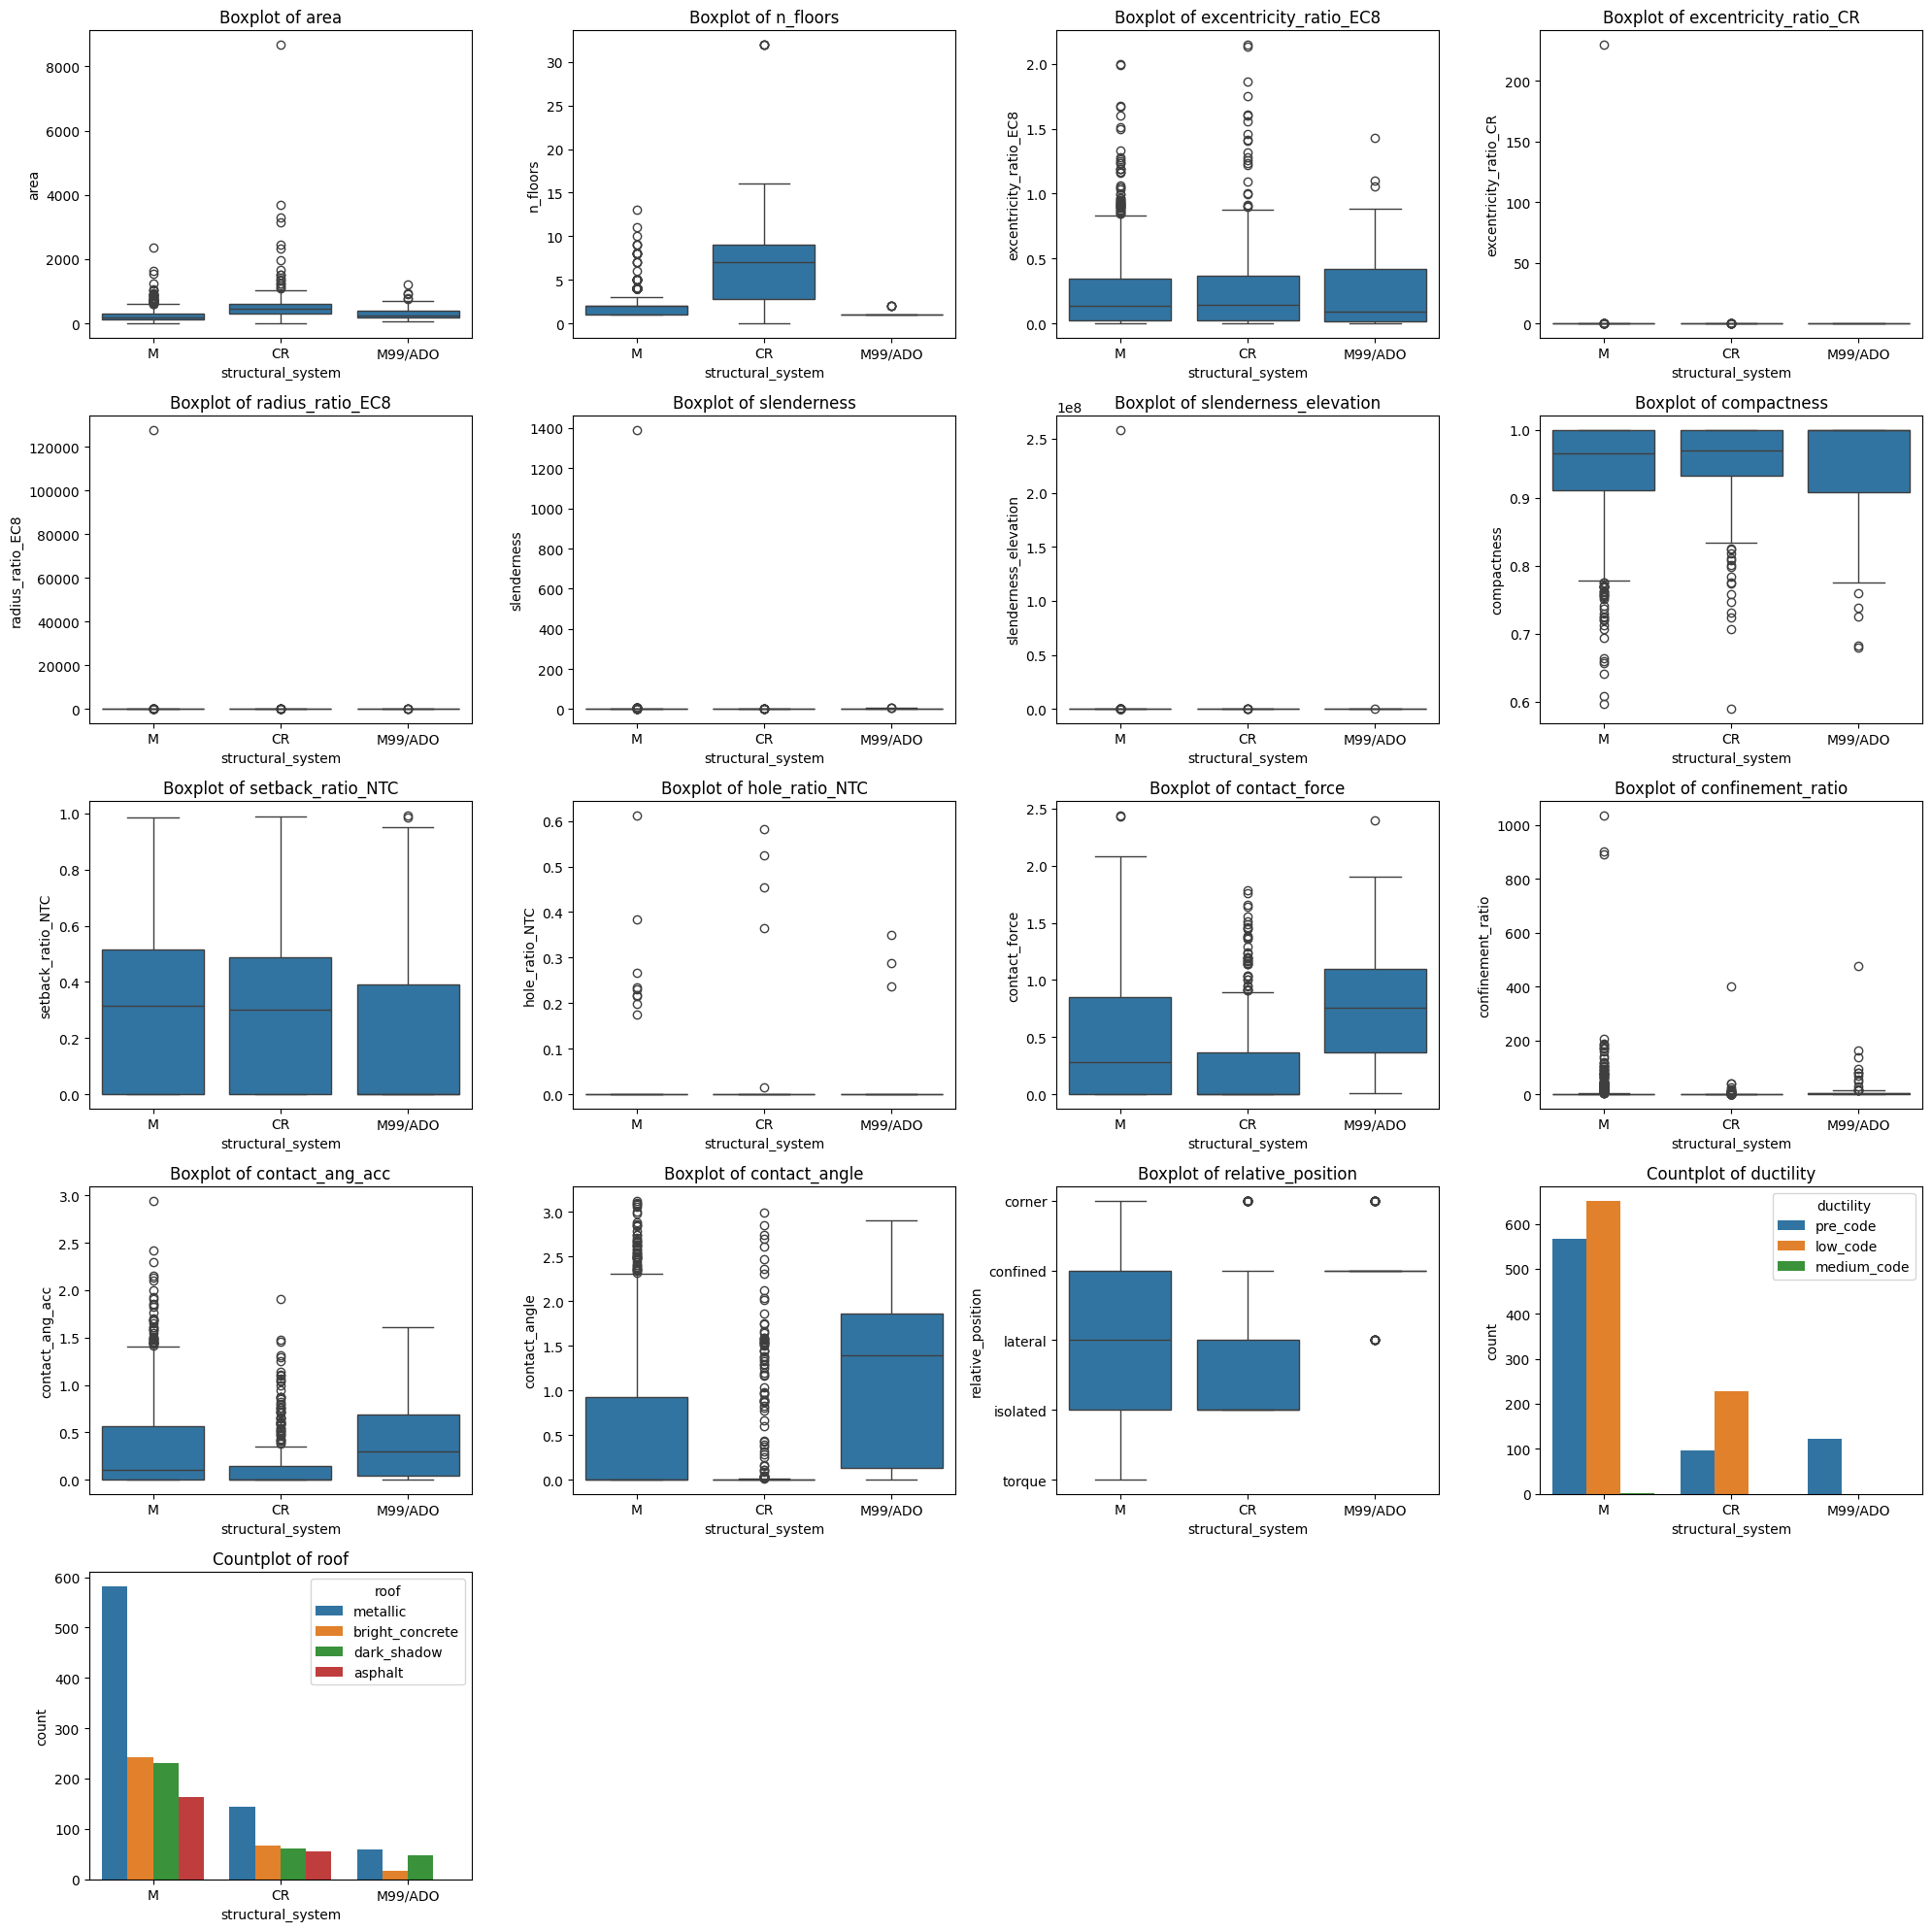

In [10]:
# Analyze the relationship between structural system and other numerical features
numerical_features = ['area', 'n_floors', 'excentricity_ratio_EC8', 'excentricity_ratio_CR',
                      'radius_ratio_EC8', 'slenderness', 'slenderness_elevation', 'compactness',
                      'setback_ratio_NTC', 'hole_ratio_NTC', 'contact_force', 'confinement_ratio',
                      'contact_ang_acc', 'contact_angle', 'relative_position']

categorical_features = ['ductility', 'roof']

total_plots = len(numerical_features) + len(categorical_features)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot numerical features
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='structural_system', y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Plot categorical features
for i, feature in enumerate(categorical_features, start=len(numerical_features)):
    sns.countplot(data=df, x='structural_system', hue=feature, ax=axes[i])
    axes[i].set_title(f'Countplot of {feature}')

# Hide any empty subplots
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()